<h1 style='color:red' align='center'>Predicting House Prices in Lagos</h1>

Dataset downloaded from here: https://www.kaggle.com/datasets/thedevastator/investigating-housing-prices-in-lagos-nigeria

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\malac\Desktop\Data\Projects\HousingPricesLagosNigeria\rent.csv") ## Loaded the rent prices into a dataframe
df.head()

,Price,Pid,Property_name,Address
0,"400,000 / year",H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos
1,"14,000,000 / year",G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos
2,"200,000 / year",H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos
3,"800,000 / year",H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos
4,"300,000 / year",H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos


In [5]:
df.shape

(9853, 4)

In [7]:
df.isna().sum()

Price            0
Pid              0
Property_name    0
Address          0
dtype: int64

In [9]:
df.duplicated().sum()

3

In [11]:
df = df.drop_duplicates()

In [13]:
df.shape

(9850, 4)

In [15]:
# Define a dictionary of keyword to property type
type_keywords = {
    'mini flat': 'mini flat',
    'flat': 'flat',
    'duplex': 'duplex',
    'office': 'office space',
    'shop': 'shop',
    'bungalow': 'bungalow',
    'commercial': 'commercial property',
    'house': 'house',
    'self contain': 'self contain',
    'land': 'land'
}

def get_property_type(name):
    name = str(name).lower()
    for keyword, label in type_keywords.items():
        if keyword in name:
            return label
    return 'other'


In [17]:
df['Property_Type'] = df['Property_name'].apply(get_property_type)

In [19]:
df.head()

,Price,Pid,Property_name,Address,Property_Type
0,"400,000 / year",H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,mini flat
1,"14,000,000 / year",G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,flat
2,"200,000 / year",H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,mini flat
3,"800,000 / year",H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,flat
4,"300,000 / year",H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,mini flat


In [21]:
df["Property_Type"].unique()

array(['mini flat', 'flat', 'self contain', 'shop', 'office space',
       'duplex', 'house', 'bungalow', 'commercial property', 'land'],
      dtype=object)

In [23]:
# Keeping only rows that do NOT contain '/ sqm' or '/ sqf' or '/ day' in the Price column
df = df[~df['Price'].str.contains('/ sqm|/ sqf|/ day', case=False, na=False)]

I decided to drop per sqm, per sqf, and per day, due to the following reason:


1. The goal is to predict price per year and model needs a clear and consistent target (y) — mixing /year, /sqm, and /sqf would confuse the model.


2. /sqm and /sqf need extra info to convert. e.g; To turn /sqm into /year, you must know the property's area, multiplying price_per_sqm and area to get price_per_year. But many listings don’t give area and it is inconsistent which could be risky or noisy


3. Cleaner data = better model
Dropping inconsistent pricing units will improve model accuracy, reduce preprocessing complexity, make your EDA and visualizations more reliable

In [26]:
df.head(20)

,Price,Pid,Property_name,Address,Property_Type
0,"400,000 / year",H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,mini flat
1,"14,000,000 / year",G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,flat
2,"200,000 / year",H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,mini flat
3,"800,000 / year",H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,flat
4,"300,000 / year",H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,mini flat
5,"300,000 / year",H5839,1 bedroom mini flat Flat / Apartment for rent ...,Alagomeji Alagomeji Yaba Lagos,mini flat
6,"300,000 / year",H5142,Self Contain for rent Akoka Abule-Oja Yaba Lagos,Yaba Akoka Abule Oja Yaba Lagos,self contain
7,"600,000 / year",H5838,2 bedroom Flat / Apartment for rent Akoka Yaba...,Akoka Extension Akoka Yaba Lagos,flat
8,"450,000 / year",H5836,1 bedroom mini flat Flat / Apartment for rent ...,Akoka Akoka Yaba Lagos,mini flat
9,"1,000,000",H5833,3 bedroom Flat / Apartment for rent Alapere Ko...,no 24 Emmanuel street Alapere Kosofe Ikosi Lagos,flat


In [28]:
df1 = df.copy()

In [30]:
def clean_price(price):
    if pd.isna(price):
        return None
    # Convert to string and remove commas, and '/ year'
    price = str(price).lower()
    price = price.replace(',', '').replace('/ year', '').strip()
    
    try:
        return int(float(price))  # Handles things like '7000.0'
    except:
        return None

In [32]:
# Apply the function to create a cleaned Price column
df1['Price'] = df1['Price'].apply(clean_price)

In [34]:
df1.head()

,Price,Pid,Property_name,Address,Property_Type
0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,mini flat
1,14000000,G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,flat
2,200000,H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,mini flat
3,800000,H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,flat
4,300000,H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,mini flat


In [36]:
df1.shape

(9557, 5)

In [38]:
print(df1['Price'].dtype)

int64


In [40]:
def extract_bedrooms(name):
    if pd.isna(name):
        return None
        
    name = str(name).lower()

    if 'self contain' in name:
        return 1
    words = name.split()
    for i in range(len(words)):
        if words[i] == 'bedroom' and i > 0:
            try:
                return int(words[i - 1])
            except:
                return None
    return None

In [42]:
df1['No_of_Bedrooms'] = df1['Property_name'].apply(extract_bedrooms)

In [44]:
df1.head()

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms
0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,mini flat,1.0
1,14000000,G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,flat,3.0
2,200000,H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,mini flat,1.0
3,800000,H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,flat,2.0
4,300000,H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,mini flat,1.0


In [46]:
df1['No_of_Bedrooms'].isna().sum()

550

**Handling Missing values in the bedrooms based on the property_type**

In [49]:
checking = df1[df1['No_of_Bedrooms'].isna()]
checking.head()

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms
11,7000,H5831,Shop for rent Fola Agoro Yaba Lagos,Fola Agoro Fola Agoro Yaba Lagos,shop,NaN
13,500000,H5826,Office Space for rent GRA Phase 2 Beside Karis...,GRA Phase 2 Beside Karis school Magodo Kosofe ...,office space,NaN
27,1500000,H5778,300.0 square meter Flat / Apartment for rent A...,Alagomeji Alagomeji Yaba Lagos,flat,NaN
37,250000,H5751,Flat / Apartment for rent Shomolu Shomolu Lagos,off Bajulaiye road Shomolu Shomolu Lagos,flat,NaN
43,5000000,H1845,Flat / Apartment for rent Adeola Odeku Victori...,Adeola Odeku street Adeola Odeku Victoria Isl...,flat,NaN


In [51]:
checking[checking['Property_Type'] == "duplex"]

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms
158,5000000,H5622,Duplex for rent Oniru Victoria Island Lagos,Oniru Victoria Island Lagos,duplex,NaN
465,2500000,H5176,200.0 square meter Duplex for rent Anthony Vil...,Anthony Anthony Village Maryland Lagos,duplex,NaN
590,4000000,H4930,300.0 square meter Duplex for rent Mobolaji Ba...,Minimah Estate Mobolaji Bank Anthony Way Ikeja...,duplex,NaN
2010,2500000,H2394,Duplex for rent Agungi Lekki Lagos,Agungi Agungi Lekki Lagos,duplex,NaN
5508,500000,G3476,Duplex for rent Berger Ojodu Lagos,Journalist Estate Phase1 Berger Ojodu Lagos,duplex,NaN
6660,15000000,G1160,Duplex for rent Victoria Island Extension Vict...,Victoria Island Victoria Island Extension Vict...,duplex,NaN
7743,1200000,"90,F8151",Duplex for rent Bode Thomas Surulere Lagos,off Bode Thomas Bode Thomas Surulere Lagos,duplex,NaN
8435,2500000,F5979,Duplex for rent Off Bode Thomas Surulere Lagos,Off Bode Thomas Surulere Lagos,duplex,NaN


In [53]:
default_bedroom_values = {
    'flat': 2,
    'duplex': 4,
    'bungalow': 3,
    'house': 3,
    'mini flat': 1,
    'self contain': 1,
    'office space': 0,
    'shop': 0,
    'commercial property': 0,
    'land': 0
}

In [55]:
## Map default values to the property_type column
default_map = df1['Property_Type'].map(default_bedroom_values)

# Fill missing bedrooms using the mapped values
df1['No_of_Bedrooms'] = df1['No_of_Bedrooms'].fillna(default_map)

In [57]:
df1.isna().sum()

Price             0
Pid               0
Property_name     0
Address           0
Property_Type     0
No_of_Bedrooms    0
dtype: int64

In [59]:
df1.head()

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms
0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,mini flat,1.0
1,14000000,G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,flat,3.0
2,200000,H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,mini flat,1.0
3,800000,H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,flat,2.0
4,300000,H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,mini flat,1.0


In [61]:
df1['No_of_Bedrooms'] = df1['No_of_Bedrooms'].astype(int)

In [63]:
df1.head()

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms
0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,mini flat,1
1,14000000,G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,flat,3
2,200000,H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,mini flat,1
3,800000,H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,flat,2
4,300000,H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,mini flat,1


In [65]:
df1['Address'].nunique()

5776

In [67]:
known_areas = ['lekki', 'ajah', 'yaba', 'ikeja', 'ikoyi', 'victoria island', 'oshodi', 'surulere', 
               'apapa', 'gbagada', 'ikorodu', 'Ikosi', 'maryland', 
               'ilupeju', 'isolo', 'alagomeji', 'oshodi', 'festac']


def extract_area(address):
    address = str(address).lower()
    for area in known_areas:
        if area in address:
            return area
    return 'other' 

In [69]:
df1['Area'] = df1['Address'].apply(extract_area)

In [71]:
df1.head()

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms,Area
0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,mini flat,1,ajah
1,14000000,G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,flat,3,ikoyi
2,200000,H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,mini flat,1,yaba
3,800000,H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,flat,2,surulere
4,300000,H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,mini flat,1,yaba


## Treating Outliers

In [74]:
minn, maxx = df1['Price'].min(), df1['Price'].max()
print(minn, maxx)

2 1100000000


In [76]:
df1[df1['Price'] == 1100000000]

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms,Area
9635,1100000000,"908,F2285",Land for rent Falomo Ikoyi Lagos,Temple road Falomo Ikoyi Lagos,land,0,ikoyi


In [78]:
df1[df1['Price'] == 2]

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms,Area
7941,2,"100,m2,F7526",Office Space for rent Alausa Ikeja Lagos,"Jobi fele Way, CBD Alausa Ikeja (Opposite Rege...",office space,0,ikeja


In [80]:
df1[df1['No_of_Bedrooms'] == 10].head(20)

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms,Area
1102,4500000,H4036,10 bedroom Office Space for rent Off Toyin str...,Off Toyin Street Ikeja Lagos,office space,10,ikeja
1191,9000000,"10,G7844",10 bedroom Duplex for rent Omole phase 1 Omole...,Titilayo Adedoyin Omole phase 1 Omole Phase 1 ...,duplex,10,other
1421,10000000,H3644,10 bedroom Commercial Property for rent Lekki ...,Admiralty way Lekki Lekki Phase 1 Lekki Lagos,commercial property,10,lekki
1578,4500000,G5294,10 bedroom Office Space for rent Adeola Odeku ...,Adeoa Odeku Adeola Odeku Adeola Odeku Victoria...,office space,10,victoria island
1835,5000000,"10,H2782",10 bedroom Duplex for rent Olokonla LBS Ibeju-...,University view estate Olokonla Lbs Ibeju Lekk...,duplex,10,lekki
2317,2500000,H1733,10 bedroom Flat / Apartment for rent Osapa Lon...,Shoprite Road jakande Osapa London Jakande Lek...,flat,10,lekki
2594,6000000,"10,H1164",10 bedroom Duplex for rent Victoria Island Ade...,Adeola Odeku Victoria Island Adeola Odeku Vict...,duplex,10,victoria island
3296,200000,G9395,10 bedroom Commercial Property for rent Akoka ...,Unilag environment Akoka Akoka Yaba Lagos,commercial property,10,yaba
3382,145000,G1495,10 bedroom Commercial Property for rent Abule ...,Unilag Gate Abule oja Abule Oja Yaba Lagos,commercial property,10,yaba
3389,350000,F7490,10 bedroom Office Space for rent Akoka Akoka Y...,Unilag Environ Akoka Akoka Yaba Lagos,office space,10,yaba


An Office space having 10 bedrooms is not ideal (Should an Office space have a bedroom?)

Not only office space but shop, commercial property and land

Also remembering that property_name will have the real number of bedroom
e.g, 4 bedroom Commercial Property for rent Lekki, but having 0 as a value in No_of_Bedrooms

In [83]:
df2 = df1.copy()
Not_for_living = ['office space', 'shop', 'commercial property', 'land']

df2.loc[df2['Property_Type'].isin(Not_for_living), 'No_of_Bedrooms'] = 0

In [85]:
df2[df2['No_of_Bedrooms'] == 0].head(20)

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms,Area
11,7000,H5831,Shop for rent Fola Agoro Yaba Lagos,Fola Agoro Fola Agoro Yaba Lagos,shop,0,yaba
13,500000,H5826,Office Space for rent GRA Phase 2 Beside Karis...,GRA Phase 2 Beside Karis school Magodo Kosofe ...,office space,0,other
48,120000,H5743,Shop for rent Akoka Yaba Lagos,Akoka Akoka Yaba Lagos,shop,0,yaba
116,10000000,H5678,4 bedroom Commercial Property for rent Lekki P...,Maruwa(2nd roundabout) Lekki Phase 1 Lekki Lagos,commercial property,0,lekki
138,1500000,H5656,2 bedroom Office Space for rent Magodo GRA Mag...,Magodo GRA Magodo Kosofe Ikosi Lagos,office space,0,other
152,8000,H5634,Shop for rent Shomolu Shomolu Lagos,off bajulaiye road Shomolu Shomolu Lagos,shop,0,other
153,8000,H5633,Shop for rent Shomolu Shomolu Lagos,off bajulaiye road Shomolu Shomolu Lagos,shop,0,other
154,7000,H5632,Shop for rent Fola Agoro Yaba Lagos,Fola Agoro Fola Agoro Yaba Lagos,shop,0,yaba
155,7000,H5629,Shop for rent Fola Agoro Yaba Lagos,Fola Agoro Fola Agoro Yaba Lagos,shop,0,yaba
162,20000,F5725,"Office Space for rent Off medical road, Obafem...","Olu Koleosho Street, Off medical road, Obafemi...",office space,0,ikeja


In [87]:
df2.shape

(9557, 7)

In [89]:
def remove_price_outliers_by_area(df, price_col='Price', area_col='Area'):
    df_out = pd.DataFrame()
    for area, subdf in df.groupby(area_col):
        mean = subdf[price_col].mean()
        std = subdf[price_col].std()
        filtered = subdf[(subdf[price_col] >= mean - std) & (subdf[price_col] <= mean + std)]
        df_out = pd.concat([df_out, filtered], ignore_index=True)
    return df_out

In [91]:
df3 = remove_price_outliers_by_area(df2)

In [93]:
df3.shape

(9352, 7)

In [95]:
# Before vs After boxplot
def compare_boxplots(df_before, df_after, col='Price'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot(y=df_before[col], ax=axes[0])
    axes[0].set_title('Before Outlier Removal')
    axes[0].set_yscale('log')  # <-- Compress high values
    axes[0].set_ylabel('Price (log scale)')
    axes[0].grid(True)

    sns.boxplot(y=df_after[col], ax=axes[1])
    axes[1].set_title('After Outlier Removal')
    axes[1].set_yscale('log')
    axes[1].set_ylabel('Price (log scale)')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

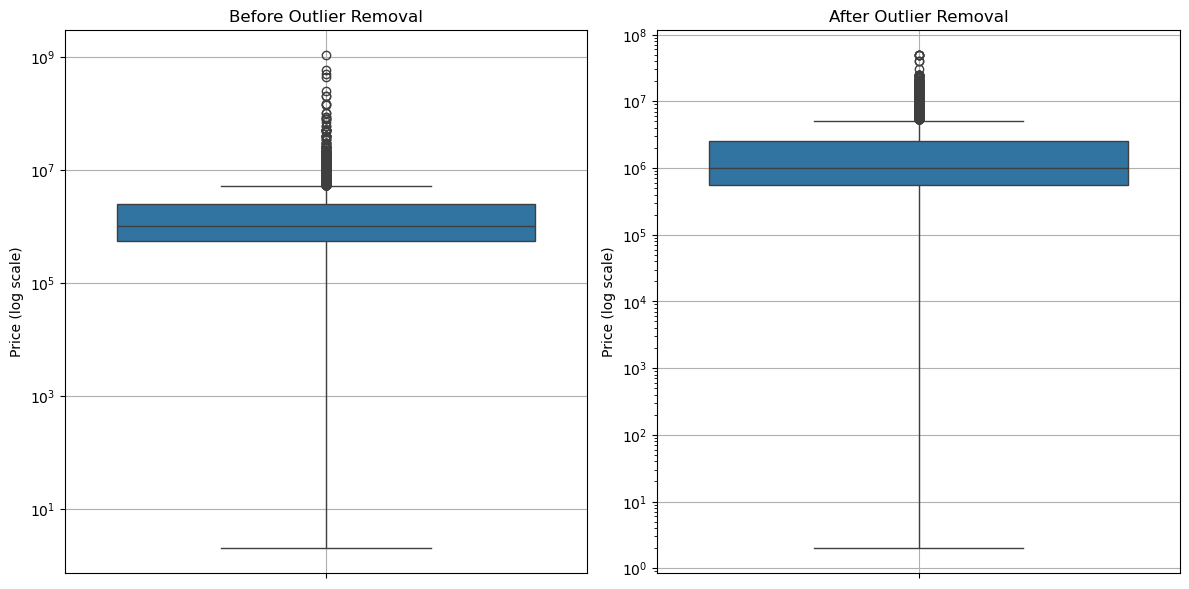

In [97]:
compare_boxplots(df2, df3)

In [99]:
df3['No_of_Bedrooms'].unique()

array([ 1,  4,  3,  2,  5,  0,  7,  6,  8, 10,  9])

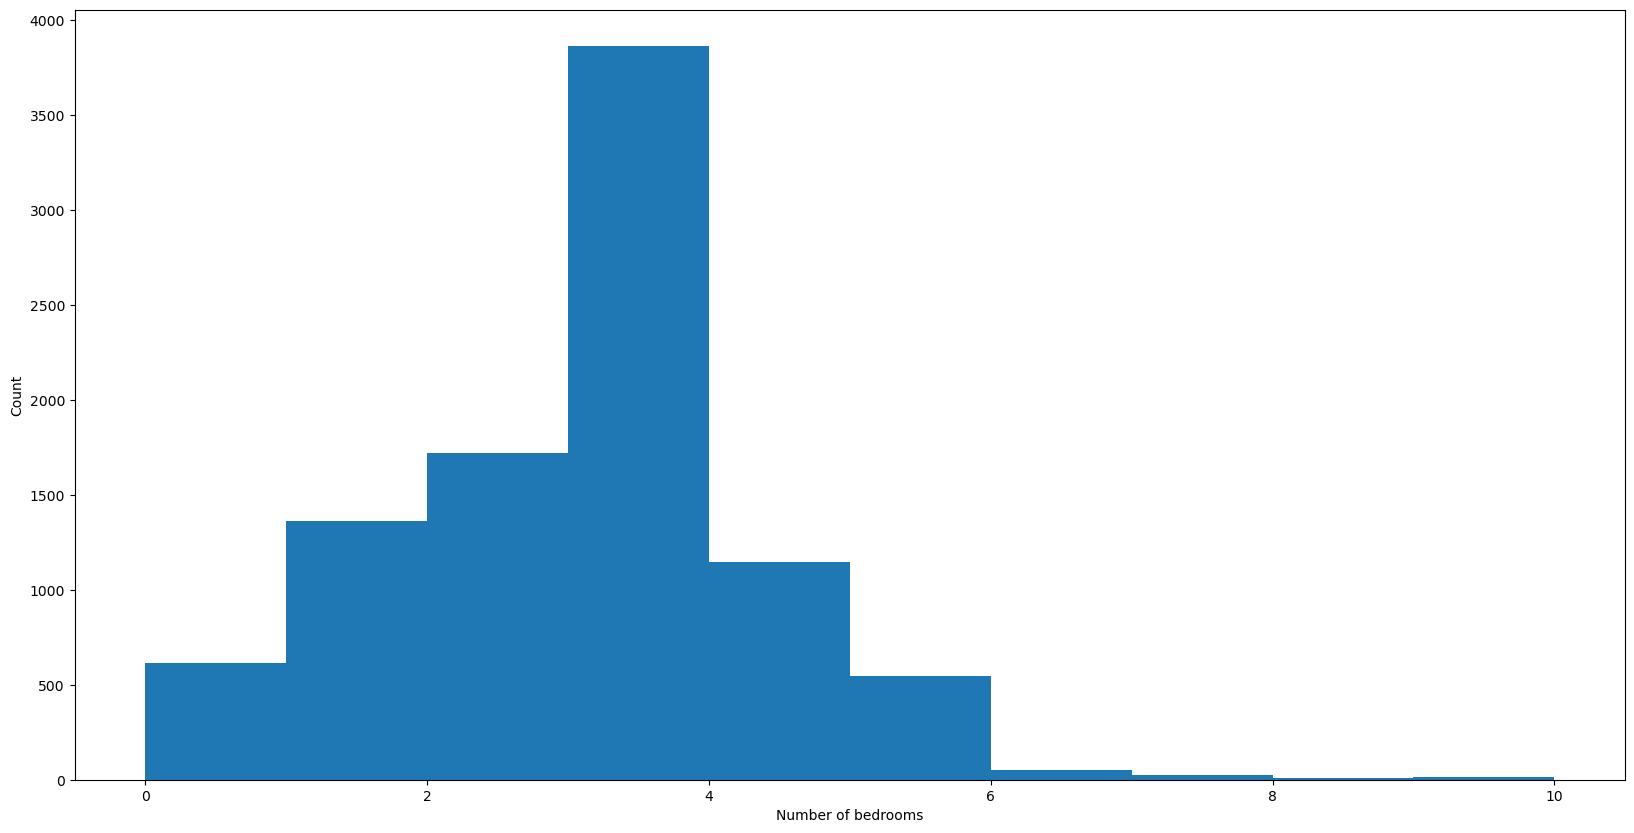

In [101]:
plt.hist(df3['No_of_Bedrooms'])
plt.xlabel("Number of bedrooms")
plt.ylabel("Count")
plt.show()

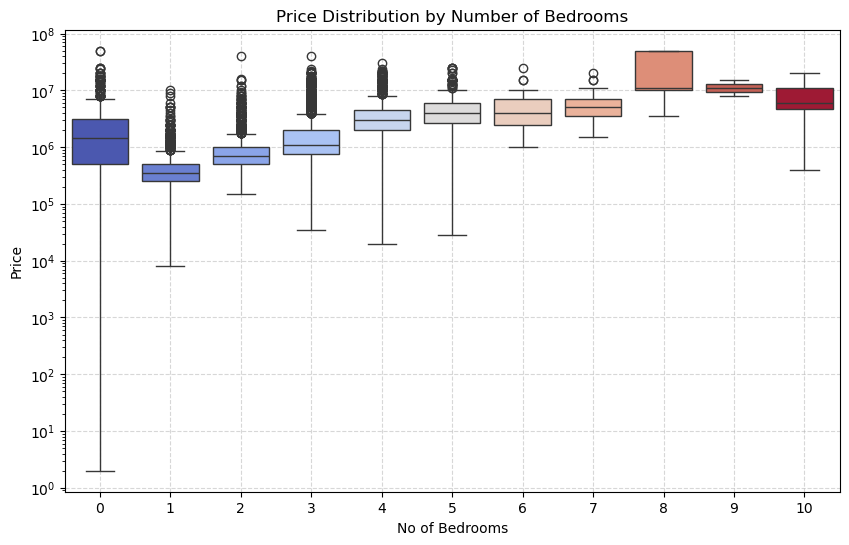

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='No_of_Bedrooms', y='Price', data=df3, hue='No_of_Bedrooms', palette='coolwarm', legend=False)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('No of Bedrooms')
plt.ylabel('Price')
plt.yscale('log')  # Optional: log scale if price has big range
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [104]:
df3.head()

,Price,Pid,Property_name,Address,Property_Type,No_of_Bedrooms,Area
0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,mini flat,1,ajah
1,1200000,H5760,4 bedroom Bungalow for rent Palm Crescent Esta...,Anu Crescent Palm Crescent Estate Badore Ajah ...,bungalow,4,ajah
2,500000,F5663,3 bedroom Flat / Apartment for rent Adeba Lako...,Bakery Adeba Lakowe Ajah Lagos,flat,3,ajah
3,300000,F6695,1 bedroom mini flat Flat / Apartment for rent ...,Fundamental container Awoyaya Ajah Lagos,mini flat,1,ajah
4,250000,H3836,1 bedroom mini flat Flat / Apartment for rent ...,Ogunfayo Ogunfayo Lakowe Ajah Lagos,mini flat,1,ajah


In [107]:
df4 = df3.copy()
df4 = df4.drop(['Pid', 'Property_name', 'Address'], axis=1)
df4.head()

,Price,Property_Type,No_of_Bedrooms,Area
0,400000,mini flat,1,ajah
1,1200000,bungalow,4,ajah
2,500000,flat,3,ajah
3,300000,mini flat,1,ajah
4,250000,mini flat,1,ajah


## Using One hot encoding for Property_Type and Area

In [110]:
df_encoded = pd.get_dummies(df4, columns=['Property_Type', 'Area'],drop_first=True)

In [112]:
print(df_encoded.columns)

Index(['Price', 'No_of_Bedrooms', 'Property_Type_commercial property',
       'Property_Type_duplex', 'Property_Type_flat', 'Property_Type_house',
       'Property_Type_land', 'Property_Type_mini flat',
       'Property_Type_office space', 'Property_Type_self contain',
       'Property_Type_shop', 'Area_apapa', 'Area_festac', 'Area_gbagada',
       'Area_ikeja', 'Area_ikorodu', 'Area_ikoyi', 'Area_ilupeju',
       'Area_isolo', 'Area_lekki', 'Area_maryland', 'Area_oshodi',
       'Area_other', 'Area_surulere', 'Area_victoria island', 'Area_yaba'],
      dtype='object')


In [114]:
df_encoded.head()

,Price,No_of_Bedrooms,Property_Type_commercial property,Property_Type_duplex,Property_Type_flat,Property_Type_house,Property_Type_land,Property_Type_mini flat,Property_Type_office space,Property_Type_self contain,...,Area_ikoyi,Area_ilupeju,Area_isolo,Area_lekki,Area_maryland,Area_oshodi,Area_other,Area_surulere,Area_victoria island,Area_yaba
0,400000,1,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1200000,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,500000,3,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,300000,1,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,250000,1,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## Building the model

In [117]:
X = df_encoded.drop(['Price'], axis=1)
y = df_encoded['Price']

In [119]:
X.head()

,No_of_Bedrooms,Property_Type_commercial property,Property_Type_duplex,Property_Type_flat,Property_Type_house,Property_Type_land,Property_Type_mini flat,Property_Type_office space,Property_Type_self contain,Property_Type_shop,...,Area_ikoyi,Area_ilupeju,Area_isolo,Area_lekki,Area_maryland,Area_oshodi,Area_other,Area_surulere,Area_victoria island,Area_yaba
0,1,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [127]:
print("Train accuracy:", lr_model.score(X_train_scaled, y_train))
print("Test accuracy:", lr_model.score(X_test_scaled, y_test))

Train accuracy: 0.5654406980220488
Test accuracy: 0.5003231711631757


In [129]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

print("Train R²:", rf.score(X_train, y_train))
print("Test R²:", rf.score(X_test, y_test))

Train R²: 0.6556627570040439
Test R²: 0.5891001084261234


In [131]:
from sklearn.model_selection import GridSearchCV

In [133]:
param_grid = {
    'n_estimators': [100, 200],        # Number of trees
    'max_depth': [None, 10, 20],       # How deep each tree can go
    'min_samples_split': [2, 5],       # Min samples to split an internal node
    'min_samples_leaf': [1, 2],        # Min samples required at each leaf node
    'max_features': ['sqrt', 'log2']   # Number of features to consider at each split
}

In [135]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,                     # 3-fold cross-validation
                           n_jobs=-1,                # Use all cores
                           verbose=1,
                           scoring='r2')             # Use R² as scoring metric

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [137]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (R²):", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
print("Test R²:", best_model.score(X_test, y_test))

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score (R²): 0.5652001304093638
Test R²: 0.559748550650125


In [157]:
def predict_price(bedrooms, property_type, area, model, feature_columns):
    """
    Predict price using a trained model and encoded feature structure.
    
    Parameters:
        bedrooms (int): Number of bedrooms
        property_type (str): e.g. 'flat', 'duplex', etc.
        area (str): e.g. 'Lekki', 'Ikeja'
        model: Trained model (e.g., RandomForestRegressor)
        feature_columns (list): X.columns used for training
        
    Returns:
        float: Predicted price
    """
    
    # Initialize input vector with zeros
    x = np.zeros(len(feature_columns))
    
    # Set bedrooms
    x[0] = bedrooms

    # Create column names that match one-hot encoded format
    property_col = f"property_type_{property_type.lower()}"
    area_col = f"area_{area.lower()}"

    # Set encoded columns to 1 if they exist
    if property_col in feature_columns:
        x[feature_columns.index(property_col)] = 1

    if area_col in feature_columns:
        x[feature_columns.index(area_col)] = 1

    # Convert to DataFrame with correct column order
    input_df = pd.DataFrame([x], columns=feature_columns)

    return model.predict(input_df)[0]

In [159]:
X.columns.tolist()

['No_of_Bedrooms',
 'Property_Type_commercial property',
 'Property_Type_duplex',
 'Property_Type_flat',
 'Property_Type_house',
 'Property_Type_land',
 'Property_Type_mini flat',
 'Property_Type_office space',
 'Property_Type_self contain',
 'Property_Type_shop',
 'Area_apapa',
 'Area_festac',
 'Area_gbagada',
 'Area_ikeja',
 'Area_ikorodu',
 'Area_ikoyi',
 'Area_ilupeju',
 'Area_isolo',
 'Area_lekki',
 'Area_maryland',
 'Area_oshodi',
 'Area_other',
 'Area_surulere',
 'Area_victoria island',
 'Area_yaba']

In [161]:
predicted_price = predict_price(1,'mini flat','ajah',rf,X.columns.tolist())

print(f"Predicted price: ₦{predicted_price:,.2f}")

Predicted price: ₦543,562.42


In [163]:
import pickle
with open('Lagos_house_price_model.pkl','wb') as f:
    pickle.dump(rf,f)

In [167]:
import joblib
feature_columns = X.columns.tolist()

joblib.dump(feature_columns, 'feature_columns.pkl')
print("Feature columns saved as feature_columns.pkl")

Feature columns saved as feature_columns.pkl
